<a href="https://colab.research.google.com/github/secutron/ShowTime/blob/master/dp0002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
###
###
!pip install tensorflow-gpu==2.0.0-beta1
###


###
###
#from __future__ import absolute_import, division, print_function, unicode_literals
#
#try:
#  # %tensorflow_version only exists in Colab.
#  %tensorflow_version 2.x
#except Exception:
#  pass
###



import tensorflow as tf
print(tf.__version__)



from tensorflow import keras
print(keras.__version__)

import matplotlib.pyplot as plt

2.0.0-beta1
2.2.4-tf


In [0]:
# keras에서 데이터 불러온다
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

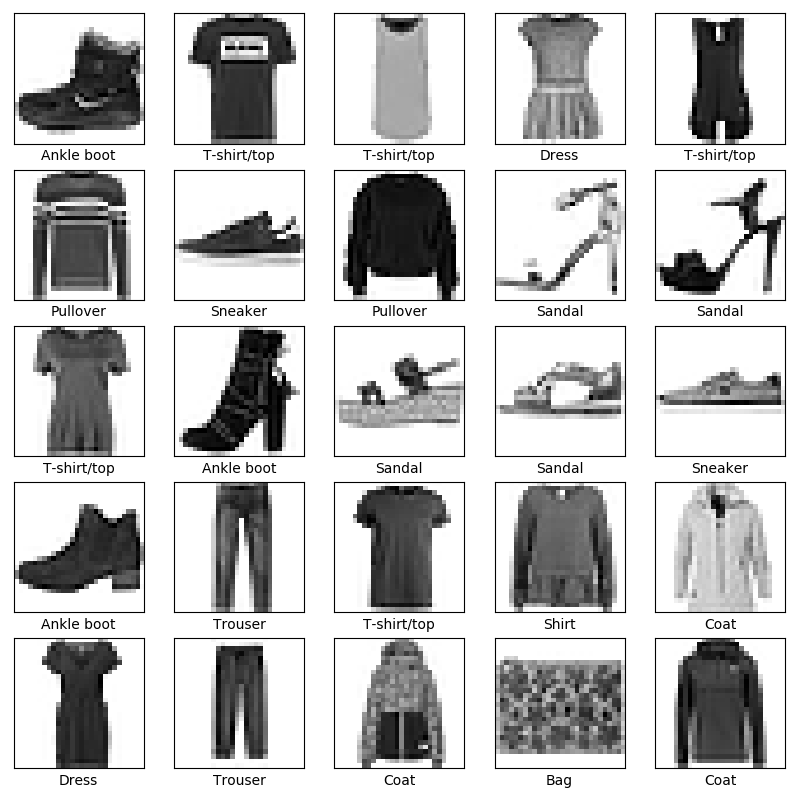

In [3]:
# train 앞 25개를 보자
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10), dpi=100)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.savefig("result.png", c="a")
plt.show()

In [11]:
import numpy as np
import collections

X, y_true = np.empty((0, 28*28)), np.empty((0))

for i in range(10):
    chosen_idx = np.random.choice(np.where(train_labels == i)[0], replace=False, size=1000)
    X = np.concatenate((X, train_images[chosen_idx].reshape(-1, 28*28)))
    y_true = np.concatenate((y_true, train_labels[chosen_idx]))

y_true_occurence = collections.Counter(y_true)

print('number of samples per class:\n')

for i in range(10): 
  print(class_names[i],' \t: ', y_true_occurence[i])


number of samples per class:

T-shirt/top  	:  1000
Trouser  	:  1000
Pullover  	:  1000
Dress  	:  1000
Coat  	:  1000
Sandal  	:  1000
Shirt  	:  1000
Sneaker  	:  1000
Bag  	:  1000
Ankle boot  	:  1000


In [12]:
# symmetric properties

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_mutual_info_score, normalized_mutual_info_score, mutual_info_score

y_pred = KMeans(n_clusters=10, random_state=0).fit_predict(X)

print(normalized_mutual_info_score(y_pred, y_true))

print(normalized_mutual_info_score(y_true, y_pred))


print(adjusted_mutual_info_score(y_pred, y_true))

print(adjusted_mutual_info_score(y_true, y_pred))



0.5164559940848118
0.5164559940848118
0.5033934967012863
0.503393496701277


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='a

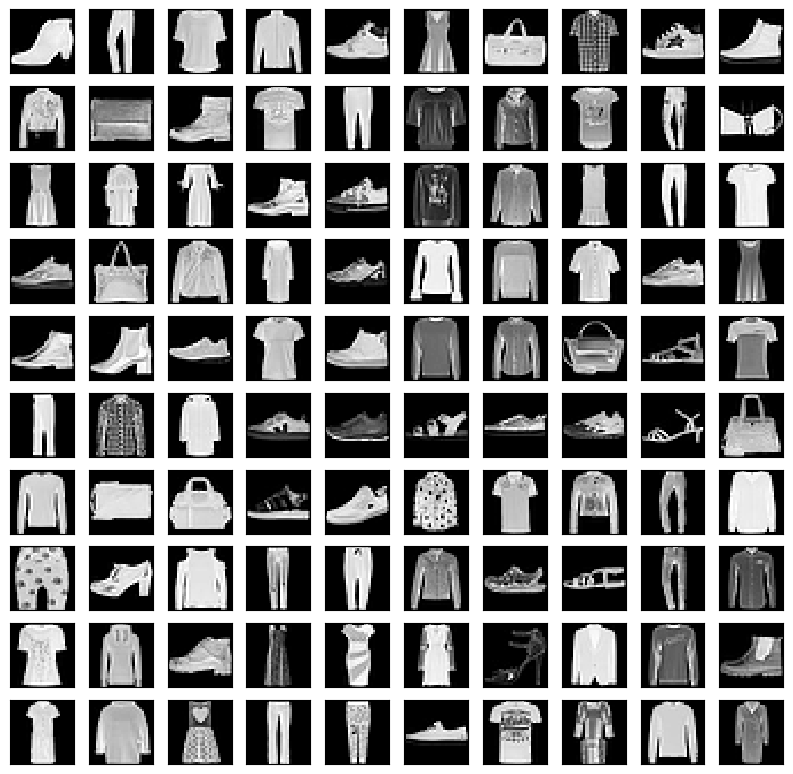

In [20]:
def viz_img(y_pred):
    n = 10
    fig = plt.figure(figsize=(10,10), dpi=100)
    box_index = 1
    for cluster in range(10):
        result = np.where(y_pred == cluster)
        for i in np.random.choice(result[0].tolist(), n, replace=False):
            ax = fig.add_subplot(n, n, box_index)
            plt.imshow(train_images[i])
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            box_index += 1
    plt.show()
    
# 가로로 10개가 클러스터    
viz_img(y_pred)    

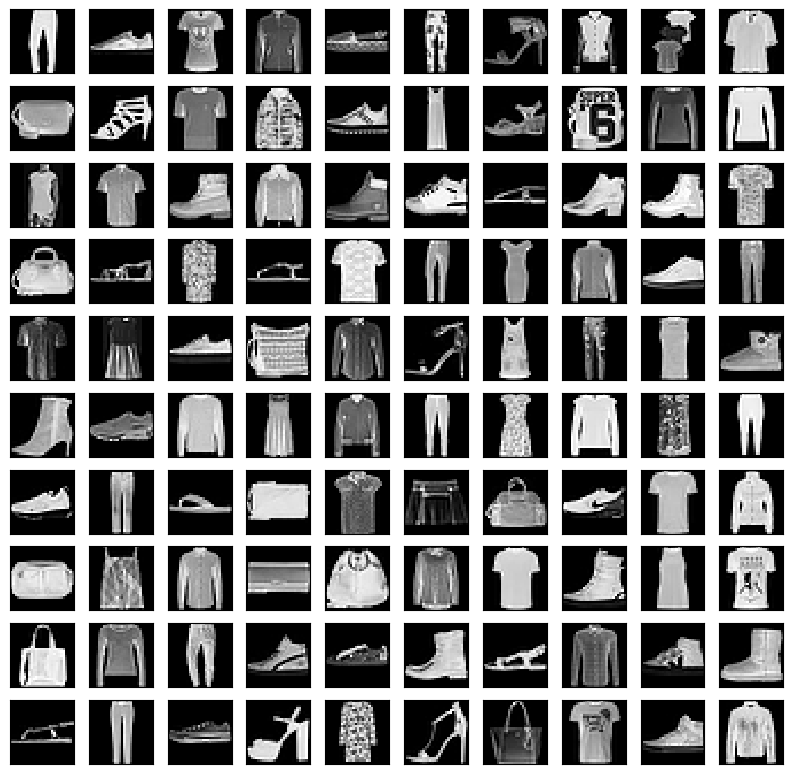